<a href="https://colab.research.google.com/github/LarryGamer/KursovayaTPR/blob/main/Kursovaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import copy

In [ ]:
first_count, second_count = 100, 200
first_mean, first_std = (10, 14), (3, 4)
second_min, second_max = (30, 56), (46, 84)

first = np.array([[np.random.normal(first_mean[0], 
                                    first_std[0], first_count)],
                  [np.random.normal(first_mean[1], 
                                    first_std[1], first_count)]])

second = np.array([[np.random.uniform(second_min[0], 
                                     second_max[0], second_count)], 
                   [np.random.uniform(second_min[1], 
                                     second_max[1], second_count)]])

In [ ]:
def makedata(array, label):
    """Функция добавляющая метки к векторам
    array: массив векторов объектов [np.array]
    label: метка [object]"""
    return np.array([array[0][0], array[1][0], np.array([label for i in range(array.shape[2])]), 
                       np.array(['' for i in range(array.shape[2])])], dtype=object).T

In [ ]:
#Создание первого и второго массива
first_data = makedata(first, 'first')
second_data = makedata(second, 'second')
data = np.concatenate([first_data, second_data])
#объединение в один массив
df_generated = pd.DataFrame(columns=['x', 'y', 'actual', 'prediction'], data=data)

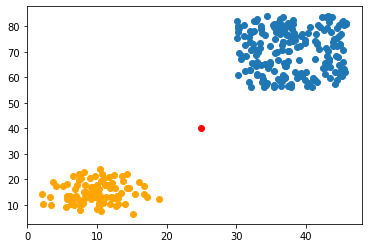

In [ ]:
plt.scatter(first_data.T[0], first_data.T[1], color='orange')
plt.scatter(second_data.T[0], second_data.T[1])
plt.scatter([25], [40], color='red')

plt.show()

In [ ]:
def distance(obj1, obj2):
    return np.sqrt((obj1[0] - obj2[0]) ** 2 + (obj1[1] - obj2[1]) ** 2)

In [ ]:
def knn_classify(obj, data, k=7):
    distances_arg = np.argsort(np.array([distance(obj, d) for d in data]))
    first_count, second_count = 0, 0
    for arg in distances_arg[:k]:
        if data[arg][2] == 'first':
            first_count += 1
        elif data[arg][2] == 'second':
            second_count += 1
            
    return 'first' if first_count > second_count else 'second'

In [ ]:
def error_count(data):
    result = 0
    for d in data:
        if d[2] != d[3]:
            result += 1
            
    return result

In [ ]:
data_pred = data.copy()
for d in data_pred:
    d[3] = knn_classify(d, data_pred)
    
df_pred = pd.DataFrame(columns=df_generated.columns, data=data_pred)
df_pred

,x,y,actual,prediction
0,10.5894,12.7381,first,first
1,7.42672,22.0643,first,first
2,11.3499,13.0225,first,first
3,6.79884,16.0485,first,first
4,6.63625,9.94403,first,first
...,...,...,...,...
295,44.9295,61.0445,second,second
296,45.5005,80.6764,second,second
297,40.59,79.587,second,second
298,39.1494,72.3237,second,second


In [ ]:
data_pred = data.copy()
for d in data_pred:
    d[3] = knn_classify(d, data_pred)
    

In [ ]:
error_count(data_pred)

0

In [ ]:

knn_classify([80, 50], data)

'second'

In [ ]:
knn_classify([25, 40], data)

'second'